## Prediction of Liver Diseases using Classification Techniques - Shreeja Nanda (shreeja2)

Liver diseases encompass a spectrum of conditions, ranging from mild inflammation to severe complications such as cirrhosis and liver cancer. These ailments can arise from various factors including viral infections, excessive alcohol consumption, obesity, autoimmune disorders, and genetic predispositions.

Given the diverse etiology and the potential severity of liver diseases, early detection and intervention are paramount. Predictive classification techniques offer promising avenues for identifying individuals at risk and facilitating timely interventions. By leveraging machine learning algorithms on comprehensive datasets encompassing clinical, genetic, and lifestyle factors, we can enhance our ability to predict, diagnose, and manage liver diseases effectively.

In this notebook, we explore the application of classification techniques in predicting liver diseases using the Indian Liver Patient Records (ILPD) Dataset, aiming to improve outcomes through proactive healthcare strategies.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN

In [2]:
%matplotlib notebook

### Prepare Data

In [3]:
df = pd.read_csv("/Users/shreeja/Desktop/Submissions/MDS/Project/Indian_Liver_Patient_Dataset_(ILPD).csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Exploratory Data Analysis

In [4]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Diagnosis                     0
dtype: int64

Albumin-Globulin Ratio has 4 null values. To fill these, let's check the distribution to decide which value to use - mean, median or mode

- If the distribution is normal, impute mean
- If the distribution is skewed, impute median/mode

<IPython.core.display.Javascript object>


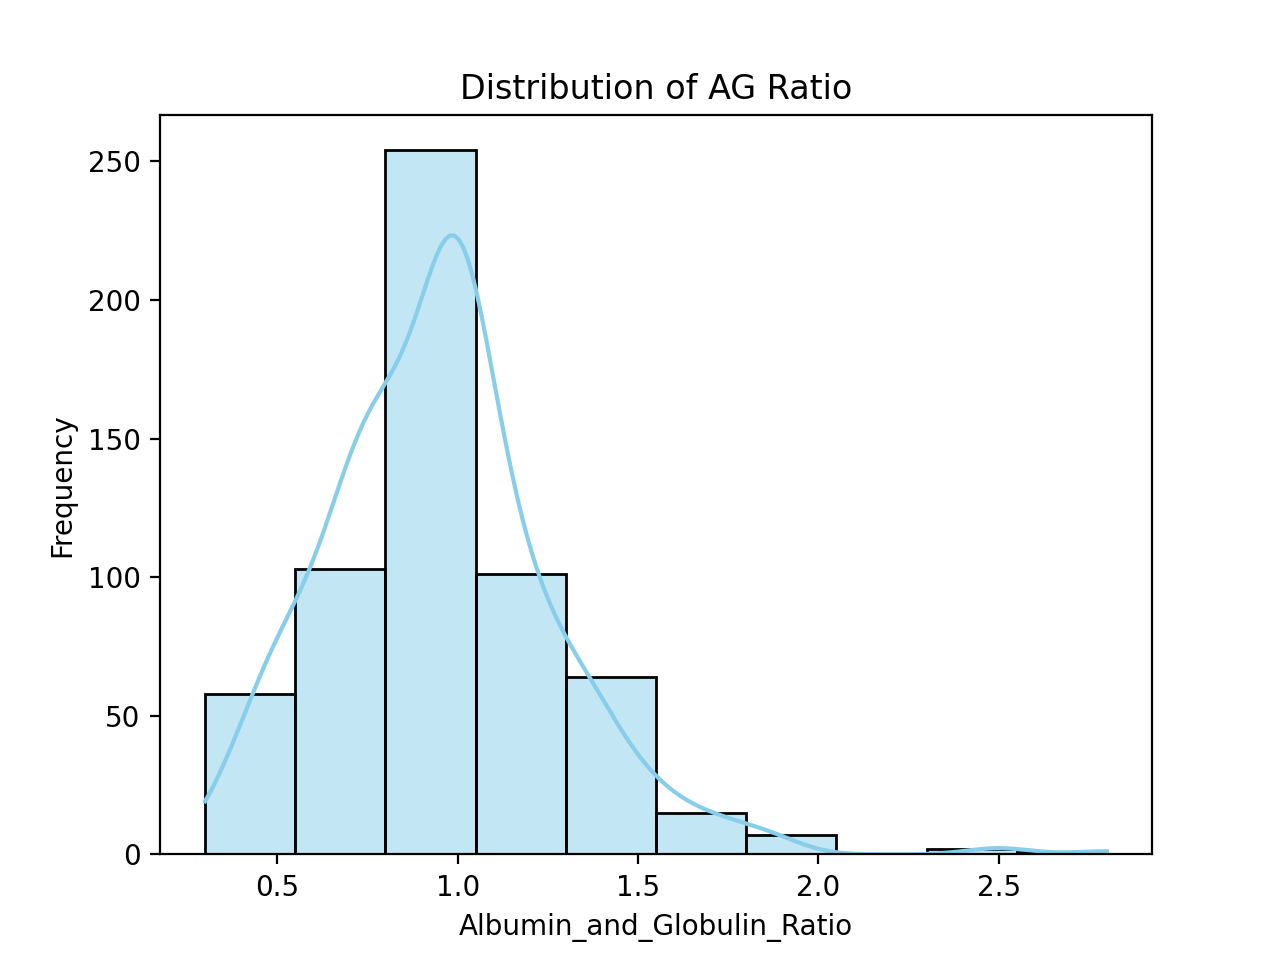

In [5]:
sns.histplot(df['Albumin_and_Globulin_Ratio'], bins=10, color='skyblue', edgecolor='black', kde=True)

plt.xlabel('Albumin_and_Globulin_Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of AG Ratio')

plt.show()

Since the values are left-skewed, I decided to go ahead with filling them up with the median value.

In [6]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,44.658456,3.201149,1.437110,286.251232,78.899836,106.940887,6.477011,3.151232,0.955747,1.316913
std,16.083610,6.093200,2.757788,238.934300,178.892062,283.066055,1.075457,0.789759,0.318705,0.465656
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,174.000000,24.000000,25.000000,5.800000,2.600000,0.710000,1.000000
50%,45.000000,1.000000,0.300000,206.000000,35.000000,41.000000,6.500000,3.100000,1.000000,1.000000
75%,57.000000,2.400000,1.200000,293.000000,60.000000,84.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df['Diagnosis'] = df['Diagnosis'].replace({1: 'Positive', 2: 'Negative'})

<IPython.core.display.Javascript object>


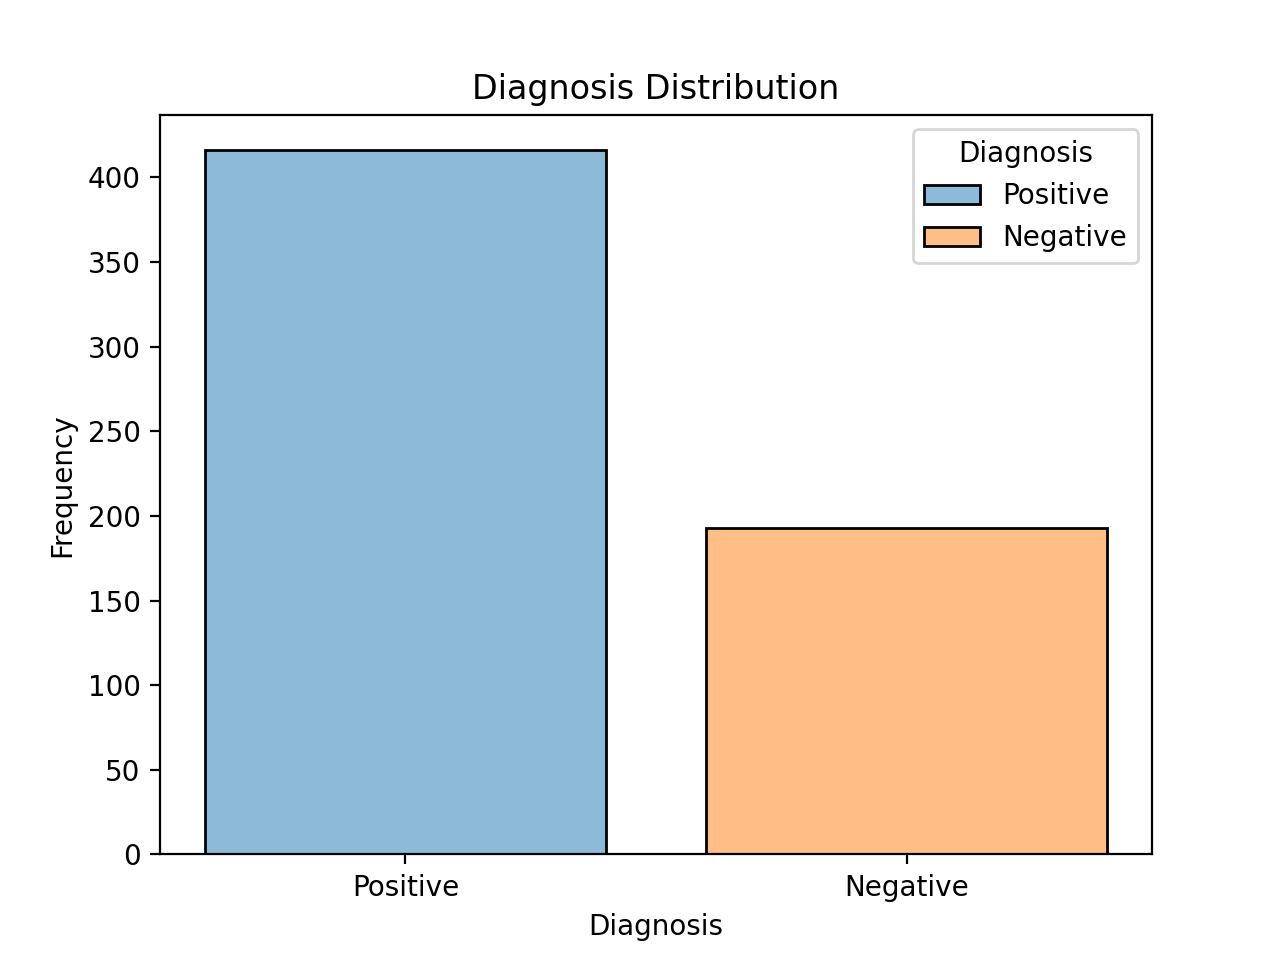

In [8]:
sns.histplot(df, x='Diagnosis', shrink=0.8, hue='Diagnosis')

plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Diagnosis Distribution')

plt.show()

<IPython.core.display.Javascript object>


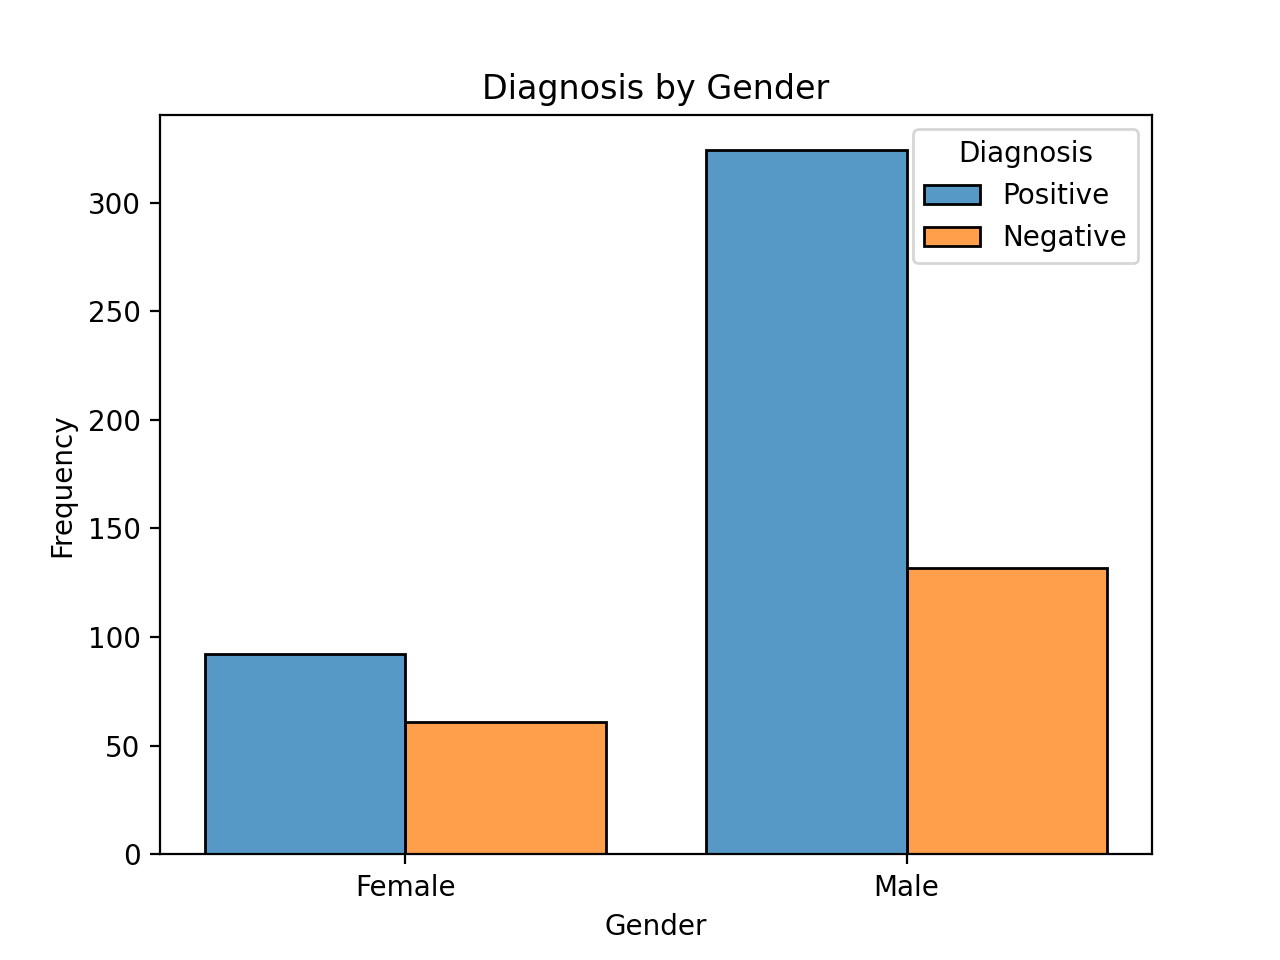

In [9]:
sns.histplot(df, x='Gender', hue='Diagnosis', multiple='dodge', shrink=0.8)

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Diagnosis by Gender')

plt.show()

In [10]:
grouped = df.groupby(['Gender', 'Diagnosis']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='Gender', columns='Diagnosis', values='count').fillna(0)
print(pivot_table)

Diagnosis  Negative  Positive
Gender                       
Female           61        92
Male            132       324


<IPython.core.display.Javascript object>


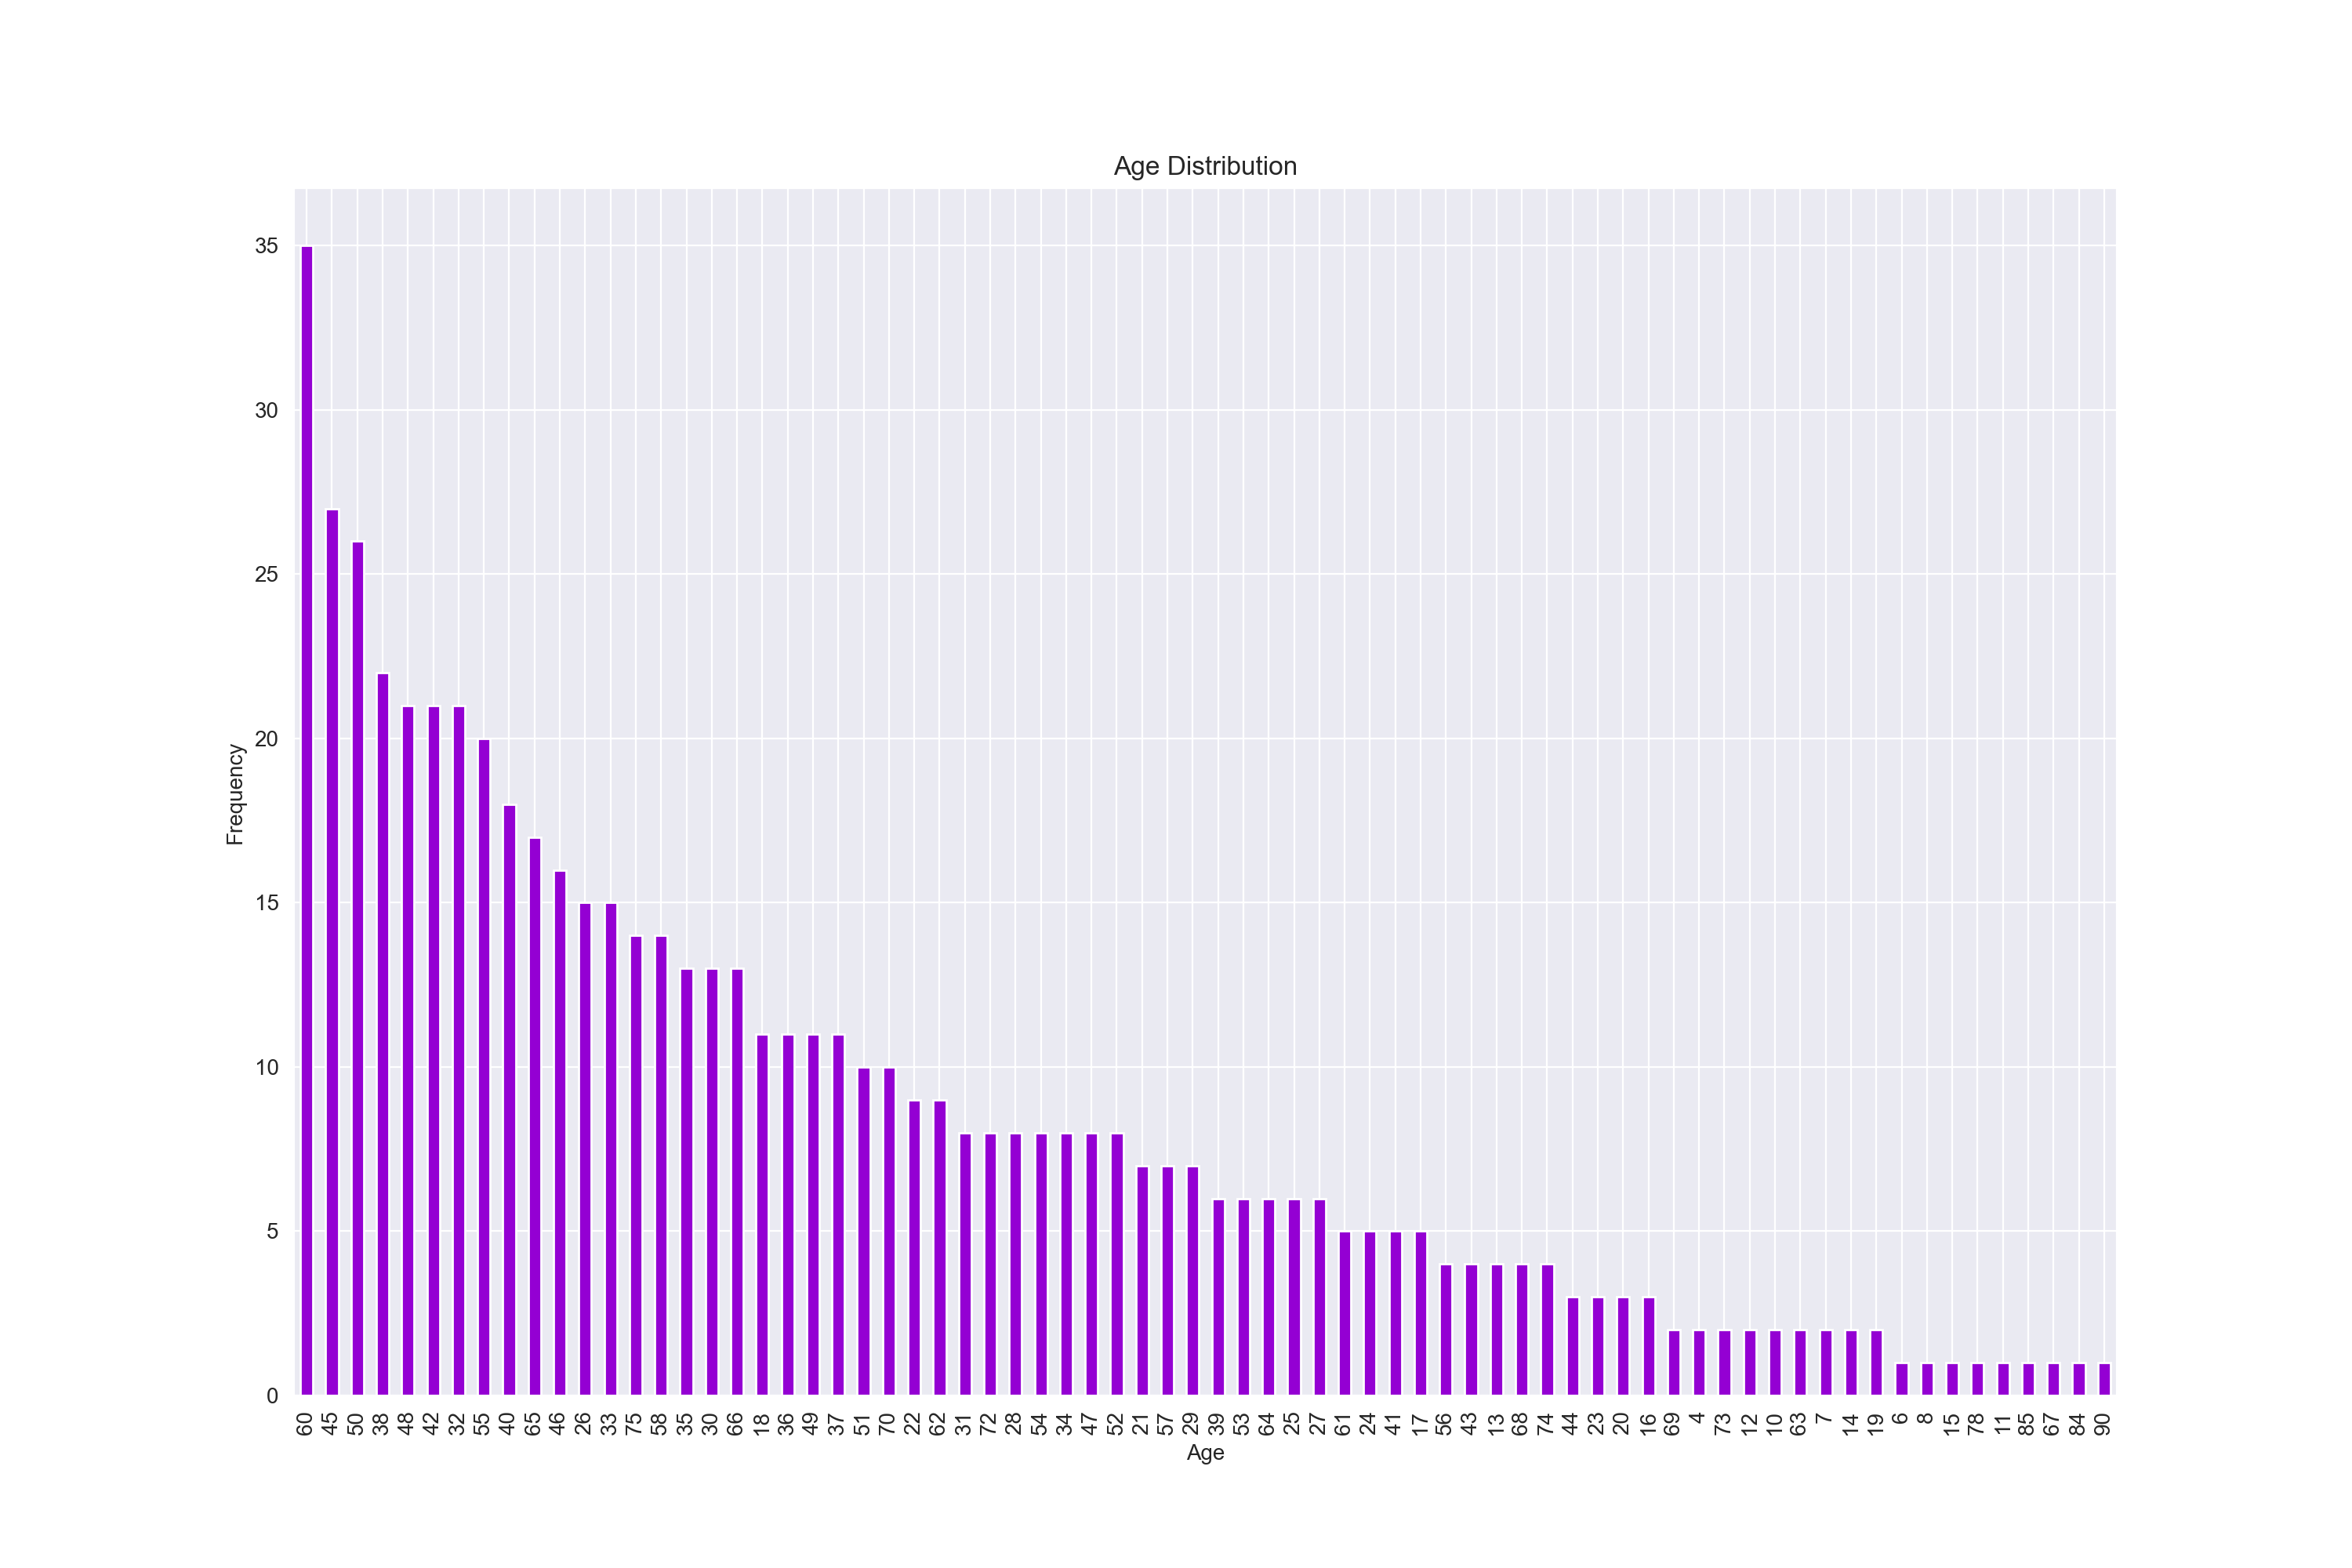

Text(0.5, 1.0, 'Age Distribution')

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
df['Age'].value_counts().plot.bar(color='darkviolet')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

<IPython.core.display.Javascript object>


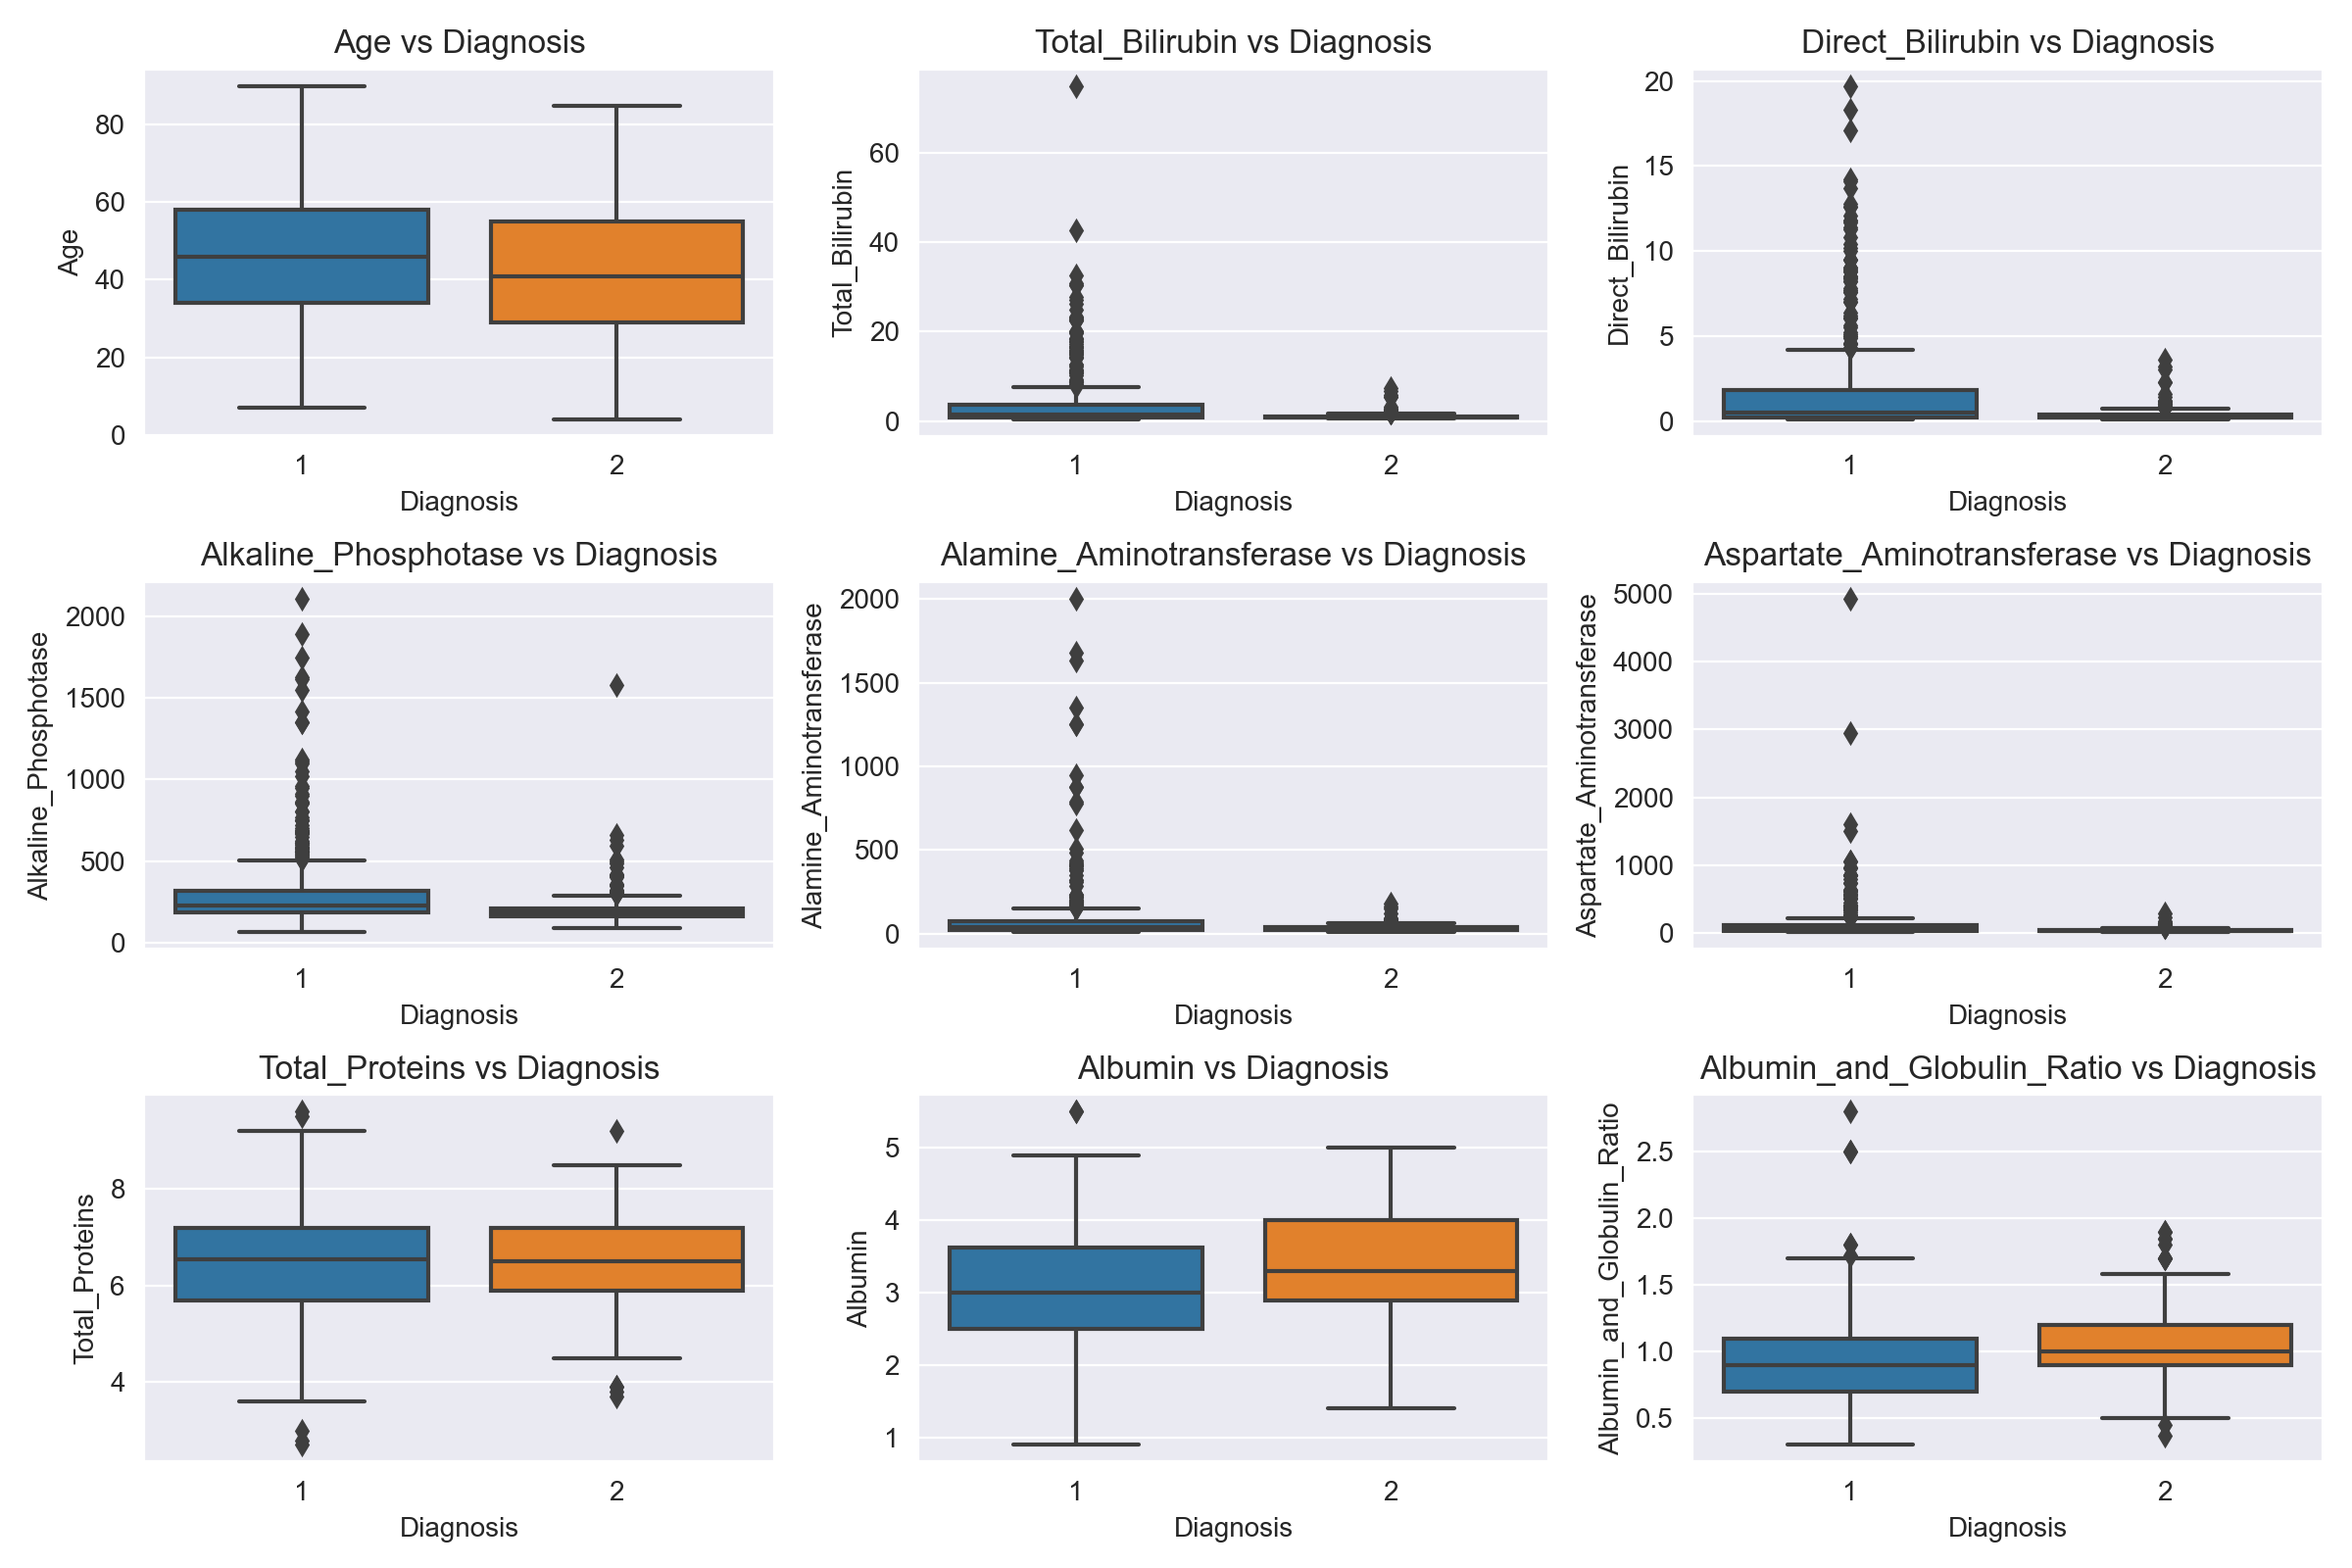

In [54]:
#Visualizing diagnostic test values for both types of cases - positive and negative

# 1 = 'Positive', 2 = 'Negative'

plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=1.5, hspace=1.5)

variables = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 
             'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
             'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 
             'Albumin_and_Globulin_Ratio']

for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    if variable == 'Gender':
        sns.countplot(data=df, x=variable, hue='Diagnosis')
    else:
        sns.boxplot(data=df, x='Diagnosis', y=variable)
    plt.title(f'{variable} vs Diagnosis')

plt.tight_layout()
plt.show()

In [13]:
df['Diagnosis'] = df['Diagnosis'].replace({'Positive':1, 'Negative':2})

<IPython.core.display.Javascript object>


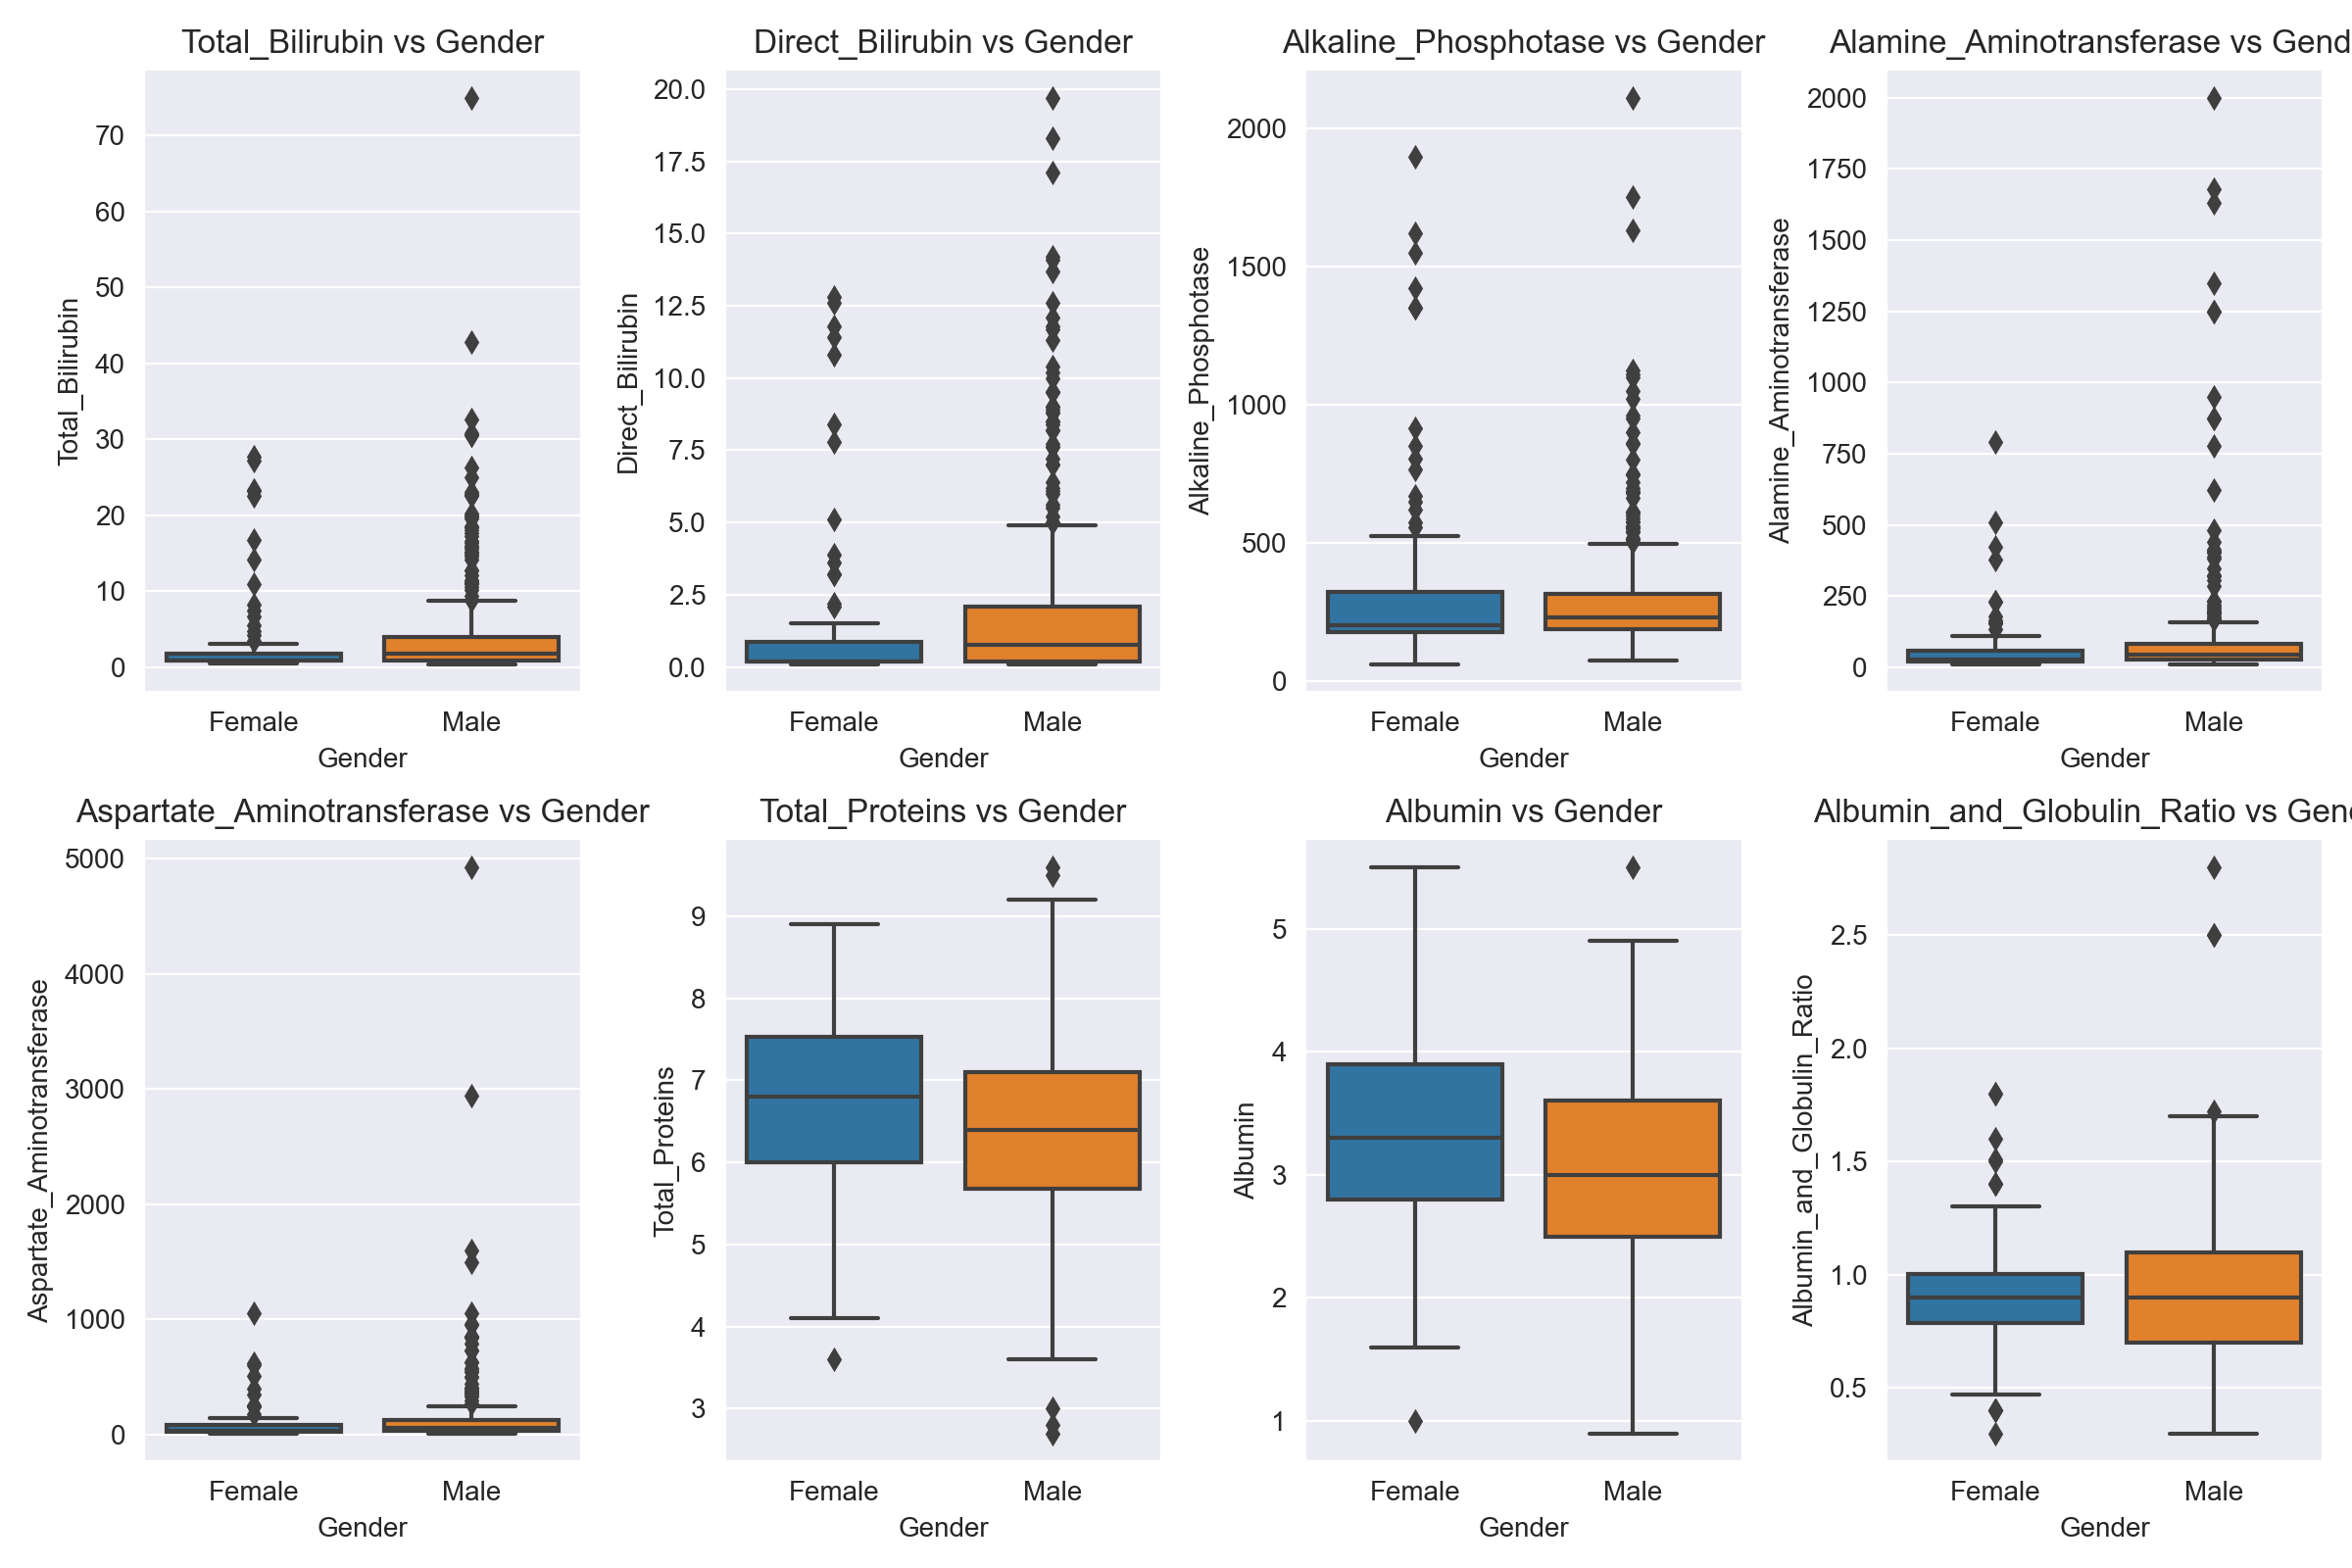

In [14]:
#Visualizing diagnostic test values for positive cases w.r.t. Gender

positive_data = df[df['Diagnosis'] == 1]

plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables = ['Total_Bilirubin', 'Direct_Bilirubin', 
             'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
             'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 
             'Albumin_and_Globulin_Ratio']

for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 4, i)
    if variable == 'Diagnosis':
        sns.countplot(data=positive_data, x=variable, hue='Gender')
    else:
        sns.boxplot(data=positive_data, x='Gender', y=variable)
    plt.title(f'{variable} vs Gender')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


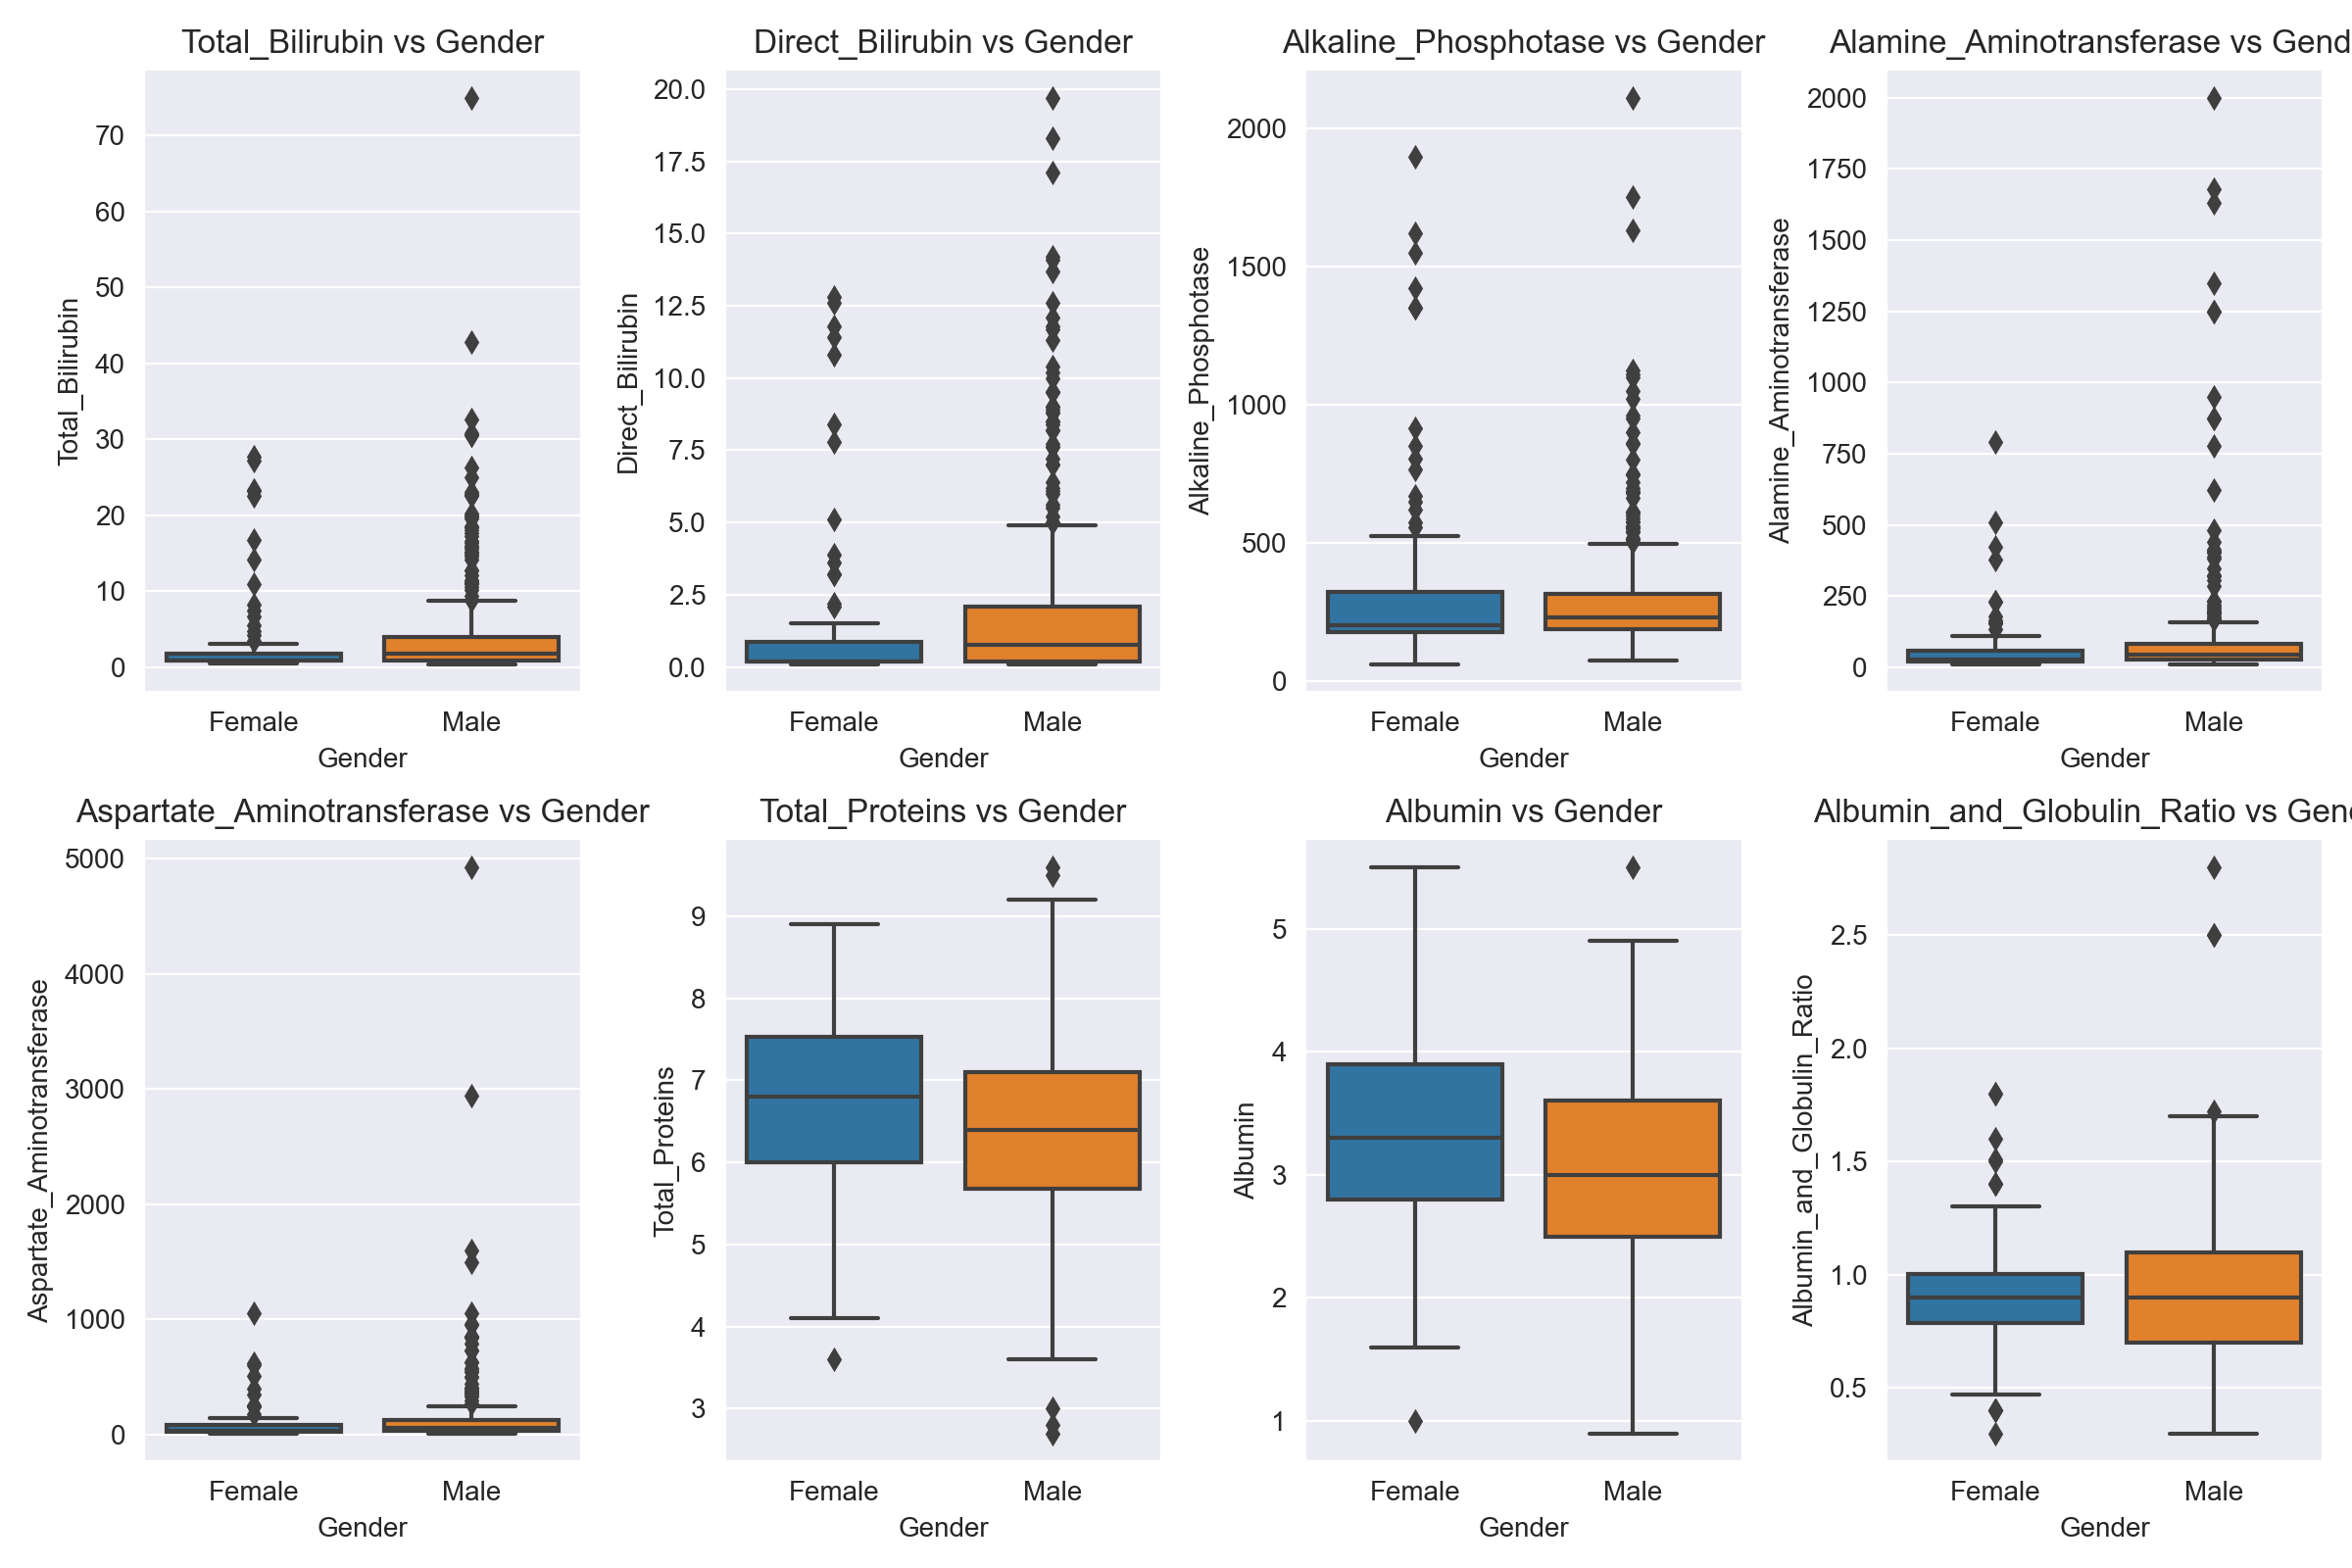

In [15]:
#Visualizing diagnostic test values for negative cases w.r.t. Gender

negative_data = df[df['Diagnosis'] == 2]

plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables = ['Total_Bilirubin', 'Direct_Bilirubin', 
             'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
             'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 
             'Albumin_and_Globulin_Ratio']

for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 4, i)
    if variable == 'Diagnosis':
        sns.countplot(data=positive_data, x=variable, hue='Gender')
    else:
        sns.boxplot(data=positive_data, x='Gender', y=variable)
    plt.title(f'{variable} vs Gender')

plt.tight_layout()
plt.show()

In [16]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})

<IPython.core.display.Javascript object>


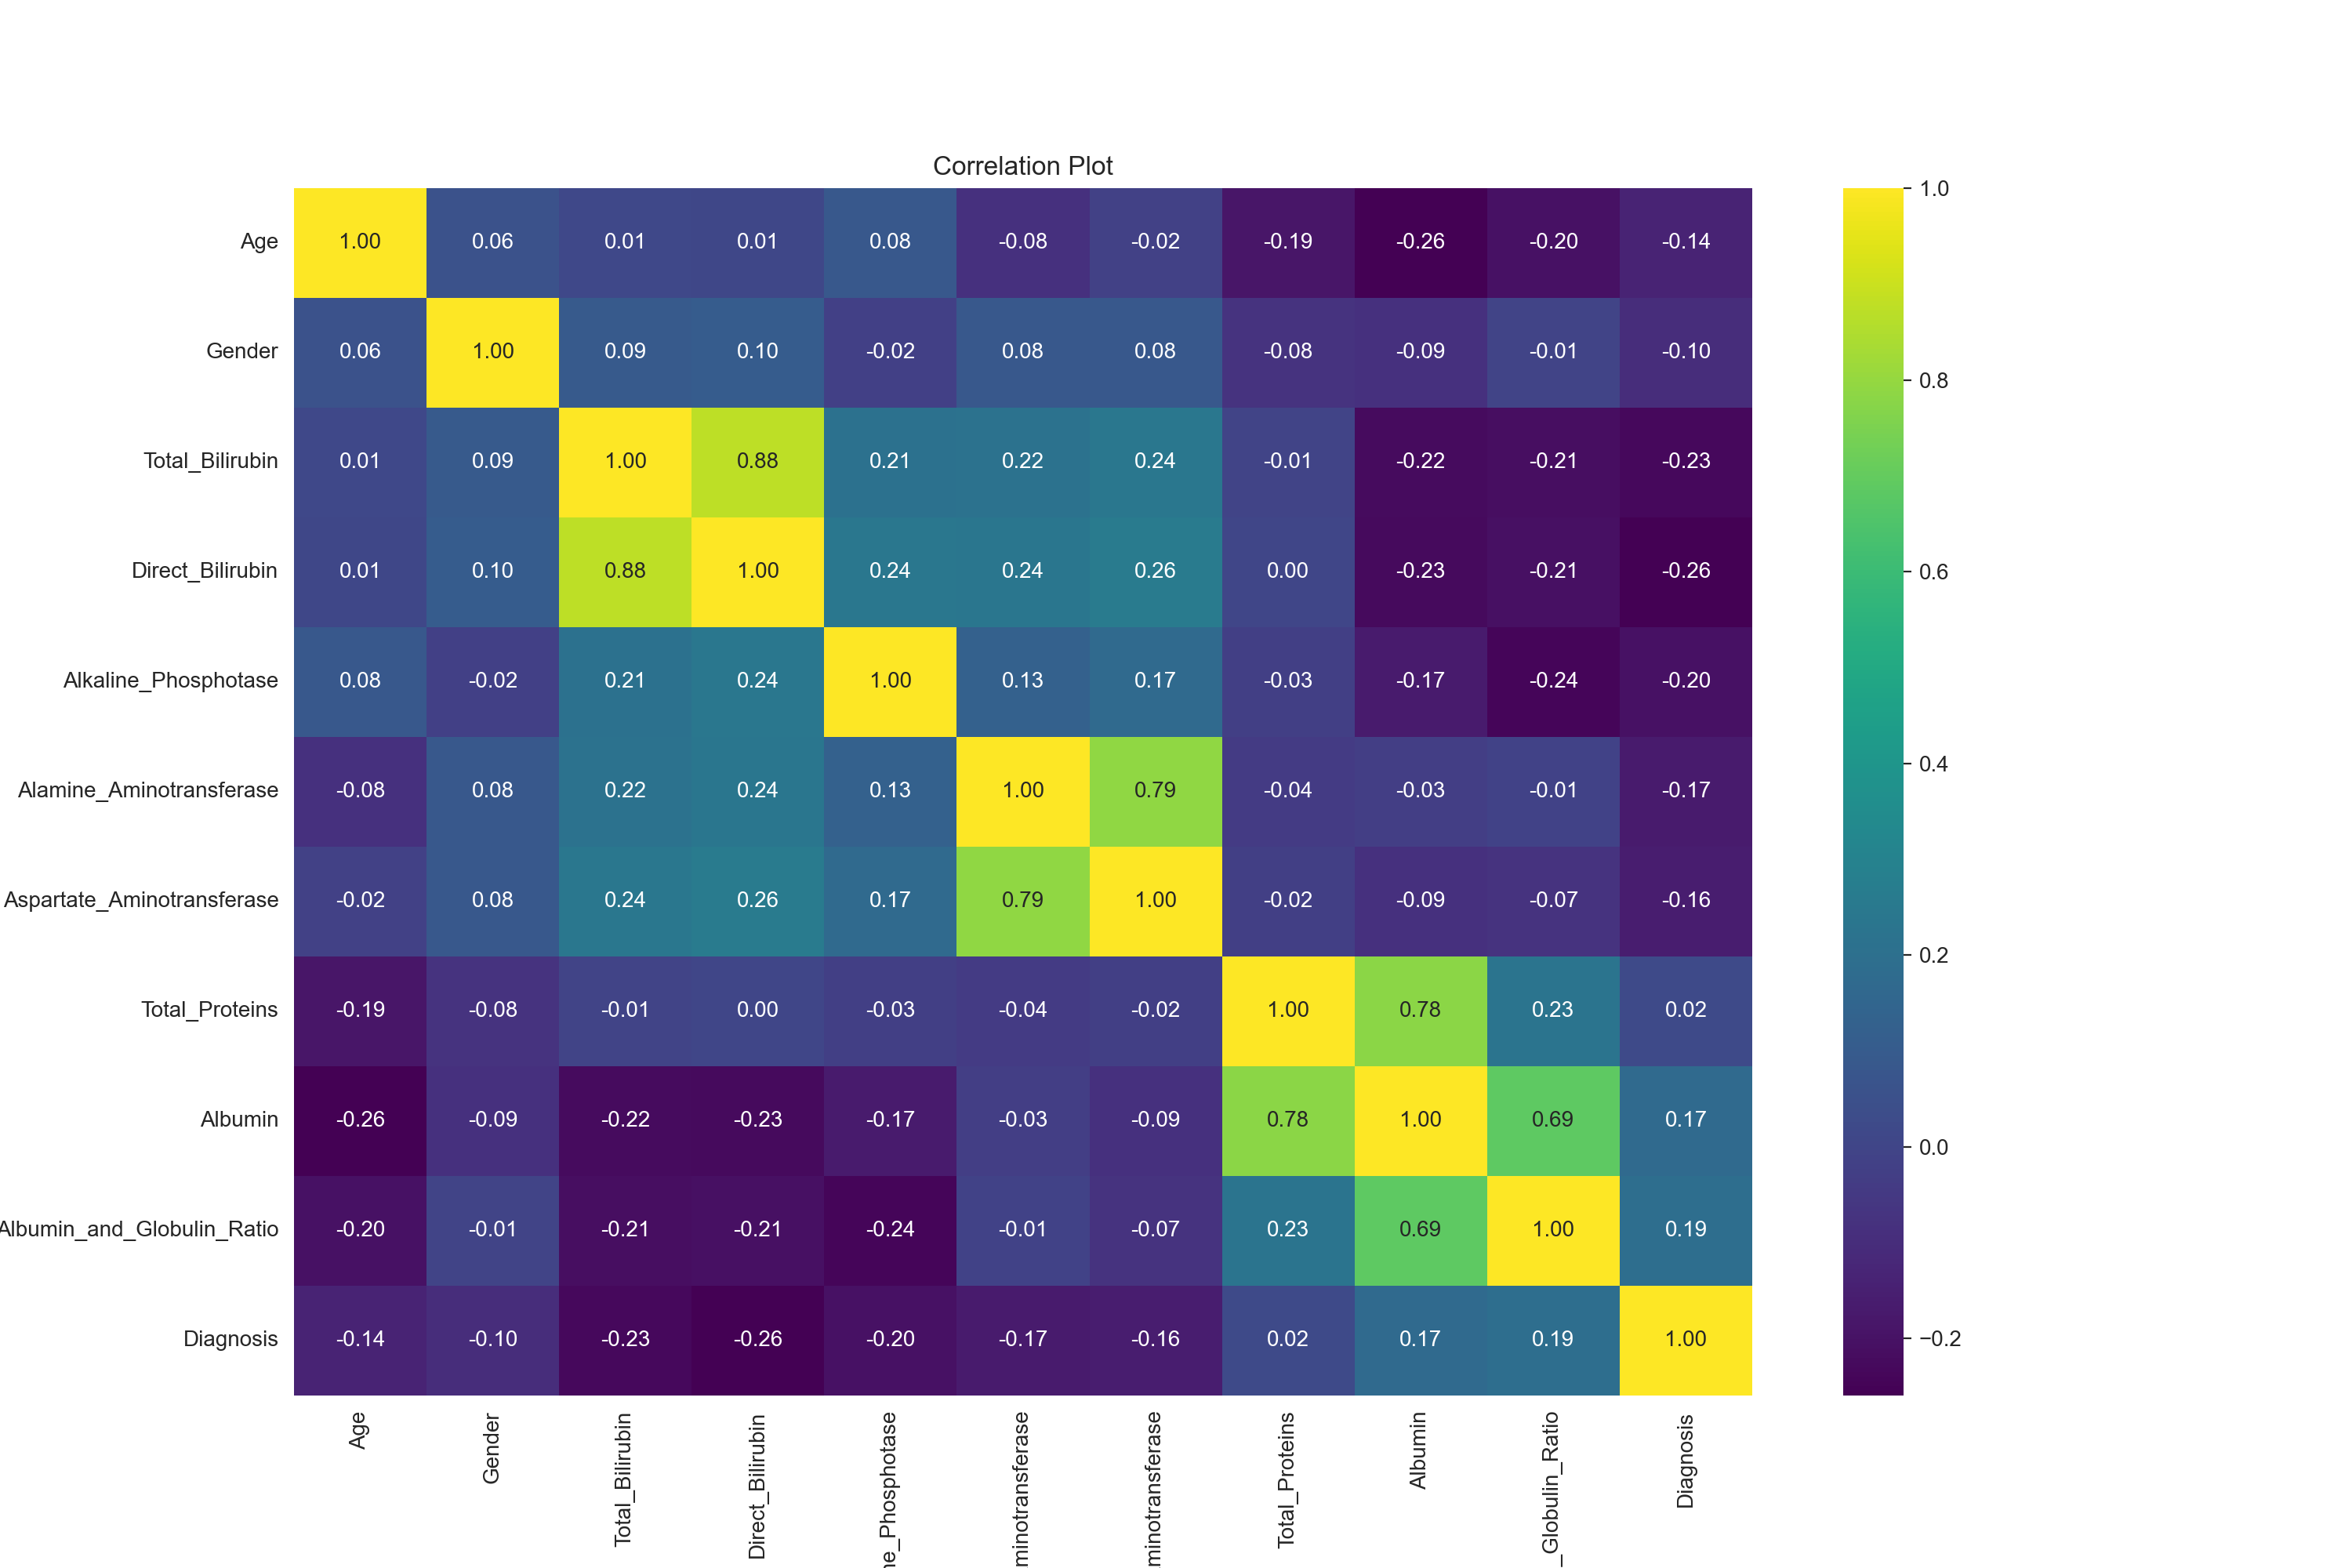

In [60]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"fontsize": 10})

plt.title('Correlation Plot')
plt.show()

### Handling Imbalanced Data using SMOTE

In [19]:
X = df.drop('Diagnosis', axis=1)
Y = df['Diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
print("Before OverSampling, counts of label 'Positive': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label 'Negative': {} \n".format(sum(Y_train == 2))) 
  
sm = SMOTE(random_state = 2) 
X_res, Y_res = sm.fit_resample(X_train, Y_train.ravel()) 
  
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(Y_res.shape)) 
  
print("After OverSampling, counts of label 'Positive': {}".format(sum(Y_res == 1))) 
print("After OverSampling, counts of label 'Negative': {}".format(sum(Y_res == 2)))

Before OverSampling, counts of label 'Positive': 286
Before OverSampling, counts of label 'Negative': 140 

After OverSampling, the shape of X: (572, 10)
After OverSampling, the shape of y: (572,) 

After OverSampling, counts of label 'Positive': 286
After OverSampling, counts of label 'Negative': 286


In [21]:
print("Before OverSampling, counts of label 'Positive': {}".format(sum(Y_test == 1))) 
print("Before OverSampling, counts of label 'Negative': {} \n".format(sum(Y_test == 2))) 
  
sm = SMOTE(random_state = 2) 
X_res_test, Y_res_test = sm.fit_resample(X_test, Y_test.ravel()) 
  
print('After OverSampling, the shape of X: {}'.format(X_res_test.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(Y_res_test.shape)) 
  
print("After OverSampling, counts of label 'Positive': {}".format(sum(Y_res_test == 1))) 
print("After OverSampling, counts of label 'Negative': {}".format(sum(Y_res_test == 2)))

Before OverSampling, counts of label 'Positive': 130
Before OverSampling, counts of label 'Negative': 53 

After OverSampling, the shape of X: (260, 10)
After OverSampling, the shape of y: (260,) 

After OverSampling, counts of label 'Positive': 130
After OverSampling, counts of label 'Negative': 130


### Random Forest Classification using SMOTE

In [22]:
clf = RandomForestClassifier(n_estimators=7)

In [23]:
clf.fit(X_res, Y_res)
Y_test_pred = clf.predict(X_res_test)

Predicted    1   2
Actual            
1          100  30
2           33  97


<IPython.core.display.Javascript object>


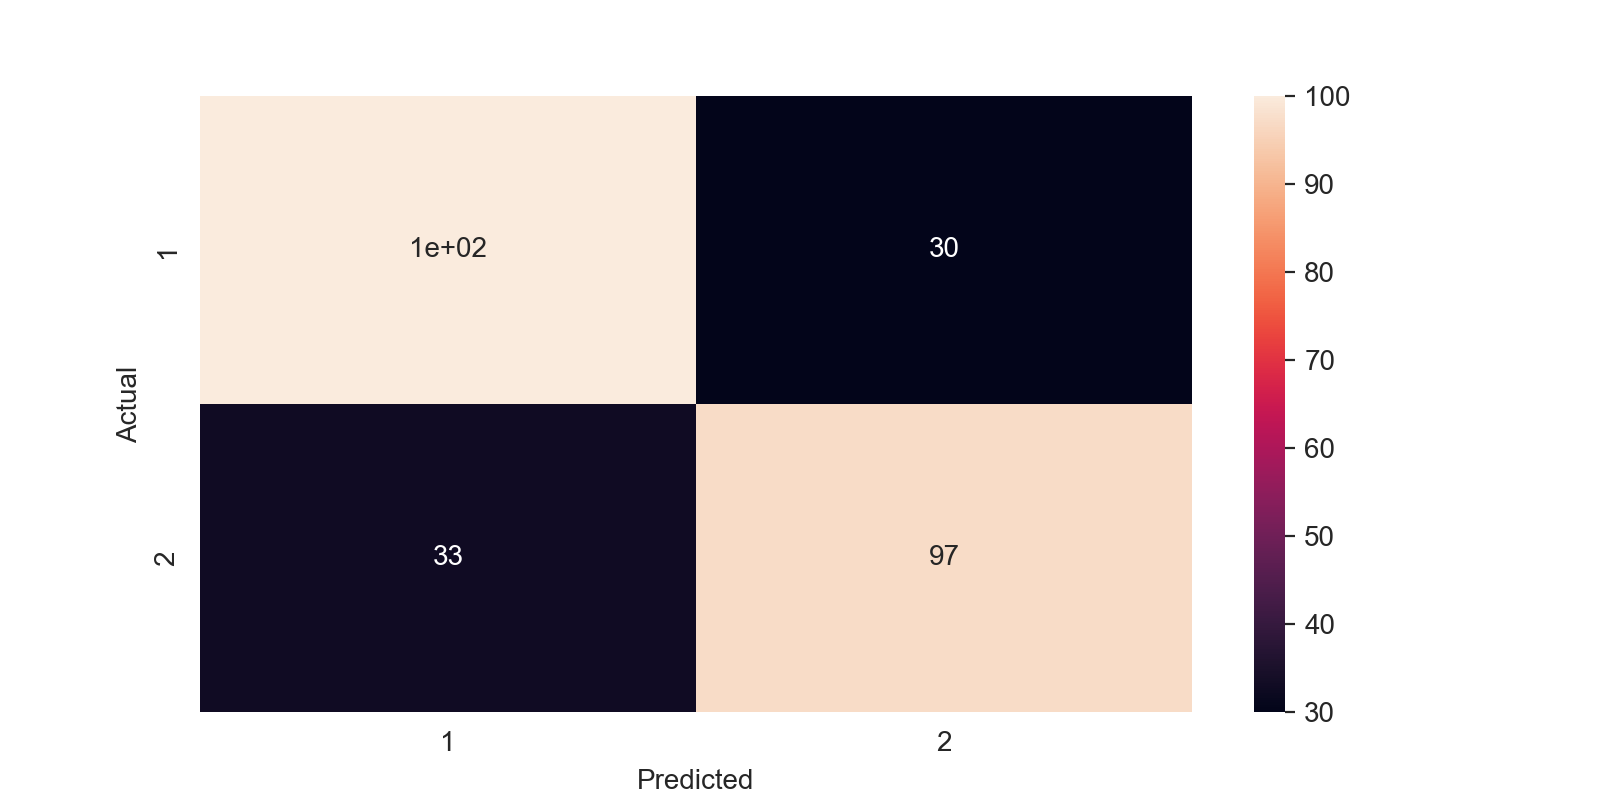

Accuracy:  0.7576923076923077
[0.11304504783072969, 0.020154724664427297, 0.09655581060255138, 0.09377079374542185, 0.16505323368977826, 0.12447543208055203, 0.1310138914141308, 0.08748950934600622, 0.08126638252658894, 0.08717517409981348]
              precision    recall  f1-score   support

           1       0.75      0.77      0.76       130
           2       0.76      0.75      0.75       130

    accuracy                           0.76       260
   macro avg       0.76      0.76      0.76       260
weighted avg       0.76      0.76      0.76       260



In [24]:
confusion_matrix = pd.crosstab(Y_res_test, Y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_res_test, Y_test_pred))
plt.show()

importances = list(clf.feature_importances_)
print(importances)

print(classification_report(Y_res_test, Y_test_pred))

### Logistic Regression using SMOTE

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(X_res, Y_res)
Y_test_pred = logmodel.predict(X_res_test)

/Users/shreeja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted   1    2
Actual            
1          85   45
2          14  116


<IPython.core.display.Javascript object>


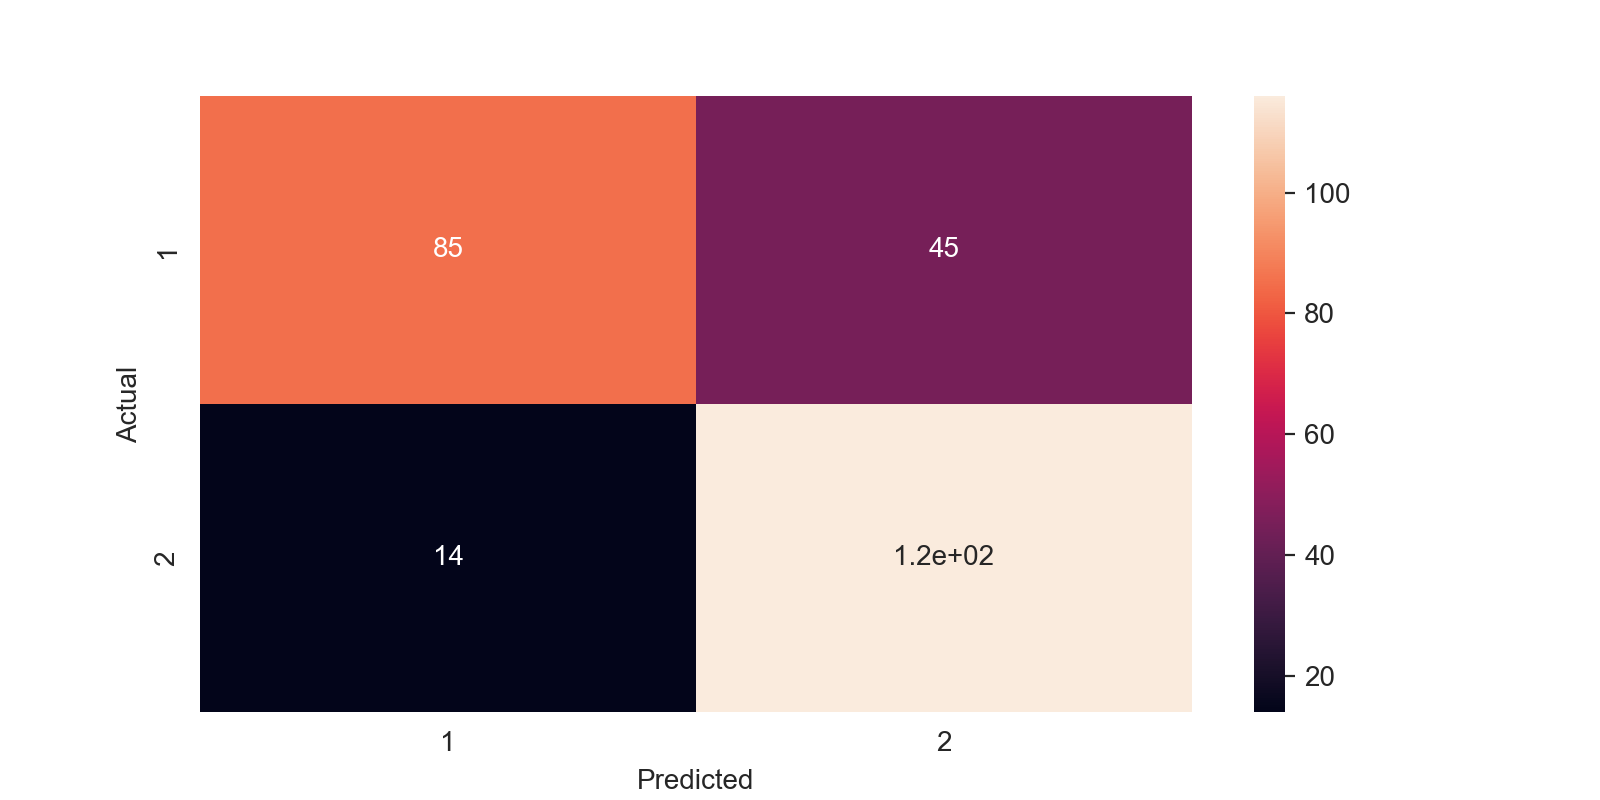

Accuracy:  0.7730769230769231
              precision    recall  f1-score   support

           1       0.86      0.65      0.74       130
           2       0.72      0.89      0.80       130

    accuracy                           0.77       260
   macro avg       0.79      0.77      0.77       260
weighted avg       0.79      0.77      0.77       260



In [28]:
confusion_matrix = pd.crosstab(Y_res_test, Y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_res_test, Y_test_pred))
plt.show()

print(classification_report(Y_res_test, Y_test_pred))

### Handling Imbalanced Data using ADASYN

In [65]:
print("Before OverSampling, counts of label 'Positive': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label 'Negative': {} \n".format(sum(Y_train == 2))) 

Before OverSampling, counts of label 'Positive': 286
Before OverSampling, counts of label 'Negative': 140 



In [66]:
adasyn = ADASYN(random_state=42)
X_train_resampled, Y_train_resampled = adasyn.fit_resample(X_train, Y_train)
X_test_resampled, Y_test_resampled = adasyn.fit_resample(X_test, Y_test)

In [67]:
print('After OverSampling, the shape of X: {}'.format(X_train_resampled.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(Y_train_resampled.shape)) 
  
print("After OverSampling, counts of label 'Positive': {}".format(sum(Y_train_resampled == 1))) 
print("After OverSampling, counts of label 'Negative': {}".format(sum(Y_train_resampled == 2)))

After OverSampling, the shape of X: (561, 10)
After OverSampling, the shape of y: (561,) 

After OverSampling, counts of label 'Positive': 286
After OverSampling, counts of label 'Negative': 275


### Random Forest Classification using ADASYN

In [47]:
clf.fit(X_train_resampled, Y_train_resampled)
Y_test_pred = clf.predict(X_test_resampled)

Predicted    1   2
Actual            
1          102  28
2           38  85


<IPython.core.display.Javascript object>


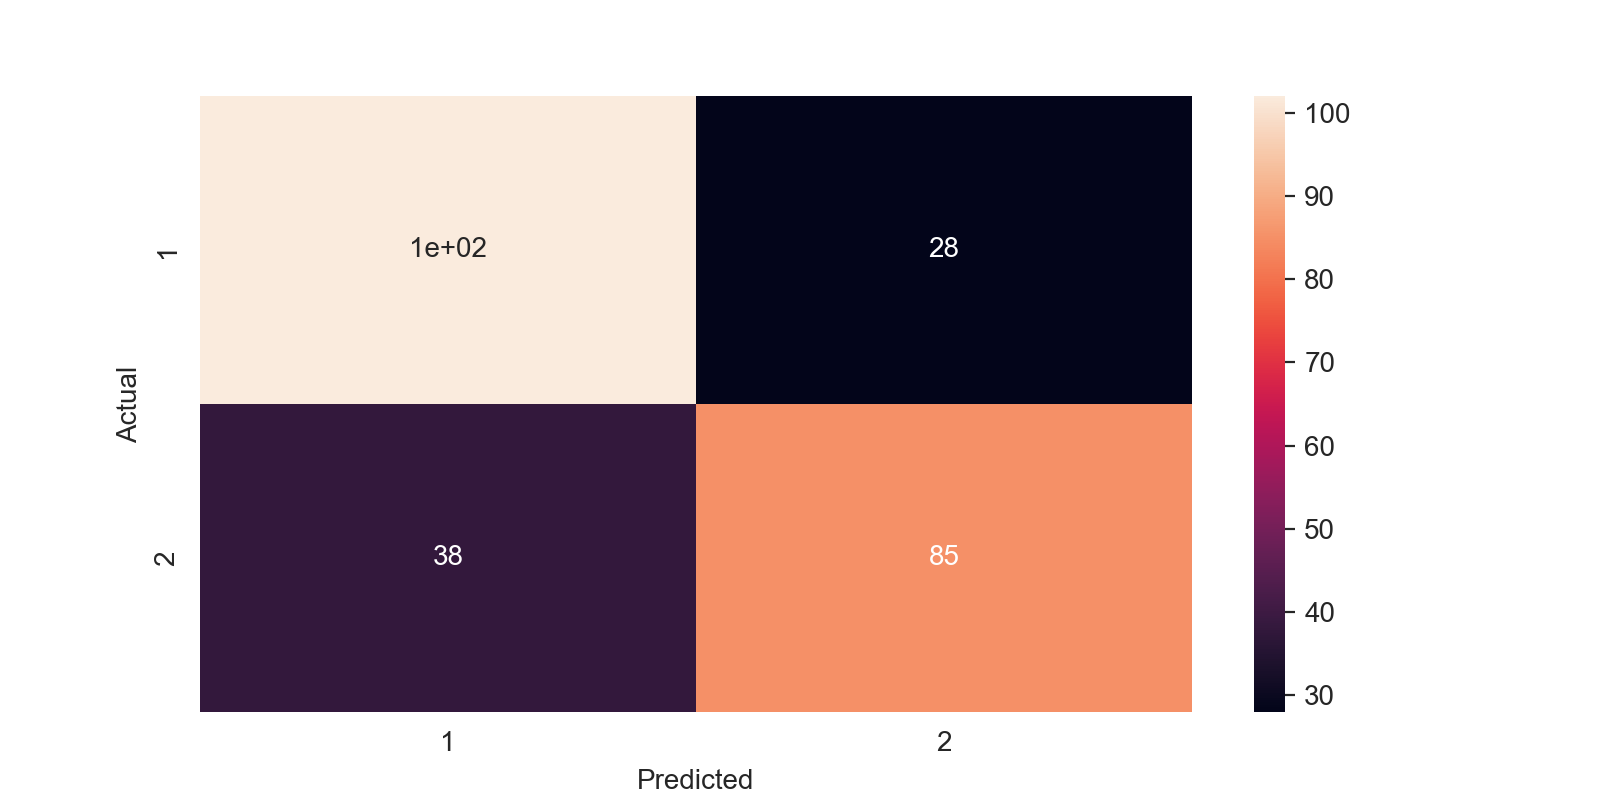

Accuracy:  0.7391304347826086
[0.12702145866955925, 0.018555794787060327, 0.10136087457542328, 0.12775765575260195, 0.1371366635444944, 0.1366907548394646, 0.10192624208604076, 0.08313053687962257, 0.07705527342282117, 0.08936474544291172]
              precision    recall  f1-score   support

           1       0.73      0.78      0.76       130
           2       0.75      0.69      0.72       123

    accuracy                           0.74       253
   macro avg       0.74      0.74      0.74       253
weighted avg       0.74      0.74      0.74       253



In [48]:
confusion_matrix = pd.crosstab(Y_test_resampled, Y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

plt.figure(figsize=(8,4))

sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_test_resampled, Y_test_pred))
plt.show()

importances = list(clf.feature_importances_)
print(importances)

print(classification_report(Y_test_resampled, Y_test_pred))

### Logistic Regression using ADASYN

In [49]:
logmodel.fit(X_train_resampled, Y_train_resampled)
Y_test_pred = logmodel.predict(X_test_resampled)

/Users/shreeja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted   1    2
Actual            
1          88   42
2          12  111


<IPython.core.display.Javascript object>


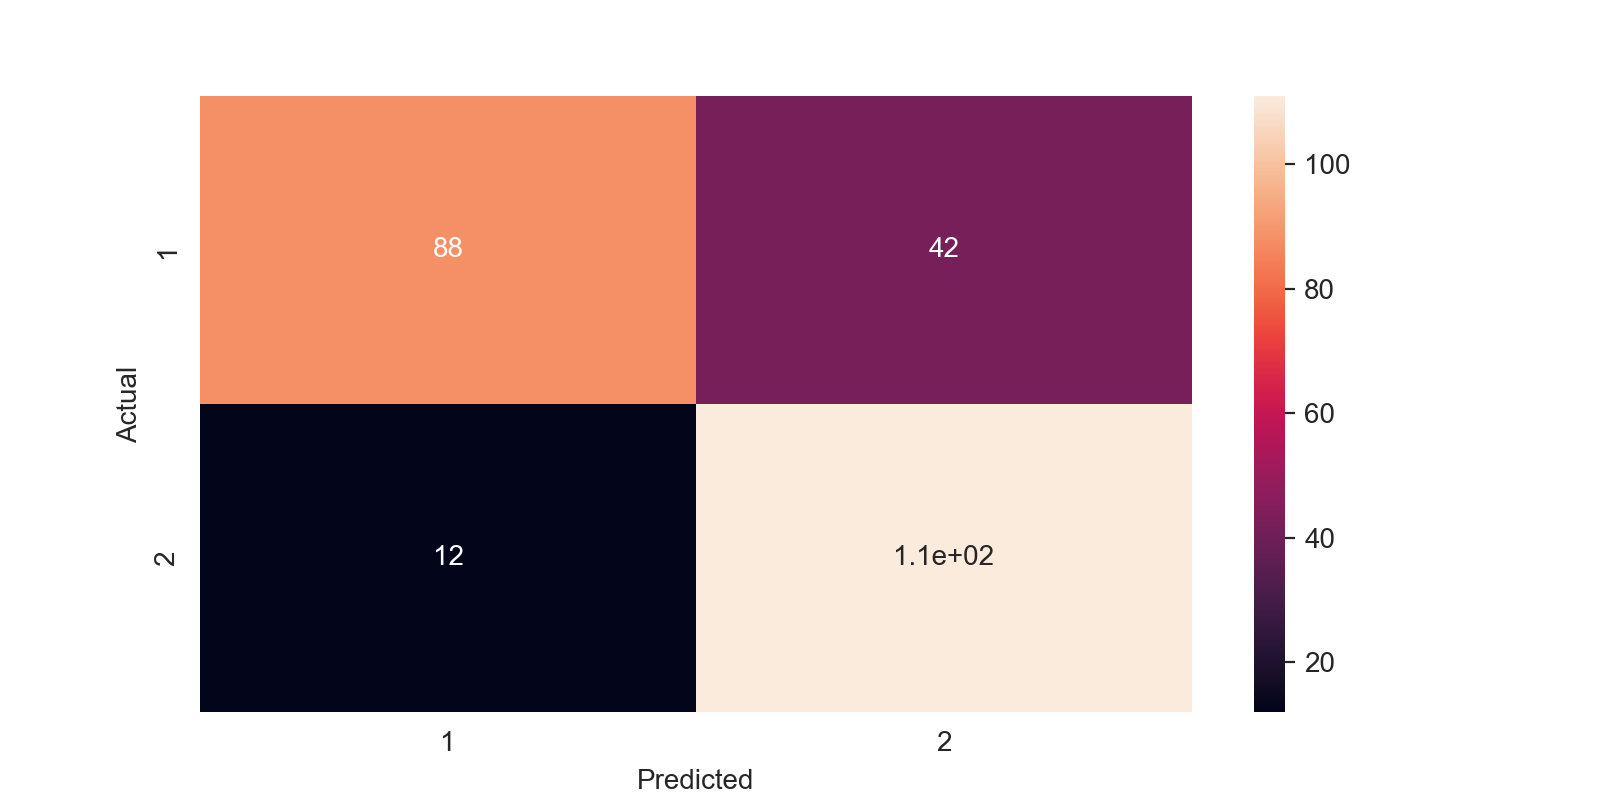

Accuracy:  0.7865612648221344
[0.12702145866955925, 0.018555794787060327, 0.10136087457542328, 0.12775765575260195, 0.1371366635444944, 0.1366907548394646, 0.10192624208604076, 0.08313053687962257, 0.07705527342282117, 0.08936474544291172]
              precision    recall  f1-score   support

           1       0.88      0.68      0.77       130
           2       0.73      0.90      0.80       123

    accuracy                           0.79       253
   macro avg       0.80      0.79      0.78       253
weighted avg       0.80      0.79      0.78       253



In [50]:
confusion_matrix = pd.crosstab(Y_test_resampled, Y_test_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_test_resampled, Y_test_pred))
plt.show()

importances = list(clf.feature_importances_)
print(importances)

print(classification_report(Y_test_resampled, Y_test_pred))